In [1]:
!pip install Gudiya==0.1.1.4
#!pip install pytorch-gradcam

In [0]:
import torchvision
import torch
import torch.optim as optim
import torch.nn as nn
import torchvision.transforms as transforms

In [0]:

import Gudiya.Model as Md
import Gudiya.TrainTestandUtils as Tt

In [0]:

from Albumentations import album_compose
from GradCAM import GradCAM

In [0]:
a =album_compose()

In [6]:
transform = transforms.Compose(
    [ transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=a)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=128,
                                          shuffle=True, num_workers=4)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=128,
                                         shuffle=False, num_workers=4)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print (device)

cuda


In [0]:
model = Md.ResNet18().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.95,weight_decay=0.0004)
scheduler = optim.lr_scheduler.OneCycleLR(optimizer,max_lr=0.1,total_steps=25)

new_model = Tt(model=model,
               device=device,
               optimizer=optimizer,
               criterion=criterion,
               scheduler=scheduler,
               trainloader=trainloader,
               testloader=testloader,
               epochs=25,
               input_size=(3,32,32),
               classes=classes)

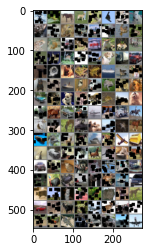

In [9]:
new_model.plot_train_images()

In [10]:
new_model.disp_summary()

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
       BatchNorm2d-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
       BatchNorm2d-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
       BatchNorm2d-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
       BatchNorm2d-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
      BatchNorm2d-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
      BatchNorm2d-14          [-1, 128,

In [11]:
new_model.runModel()

  0%|          | 0/391 [00:00<?, ?it/s]

EPOCH  1


Loss=1.3465299606323242 Batch_id=390 Accuracy=43.78: 100%|██████████| 391/391 [01:02<00:00,  6.26it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0095, Accuracy: 5685/10000 (56.85%)

EPOCH  2


Loss=0.8064866065979004 Batch_id=390 Accuracy=57.34: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0091, Accuracy: 6205/10000 (62.05%)

EPOCH  3


Loss=0.951703667640686 Batch_id=390 Accuracy=63.96: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0067, Accuracy: 7100/10000 (71.00%)

EPOCH  4


Loss=0.7000738382339478 Batch_id=390 Accuracy=69.95: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0057, Accuracy: 7528/10000 (75.28%)

EPOCH  5


Loss=0.6569861173629761 Batch_id=390 Accuracy=73.95: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0061, Accuracy: 7422/10000 (74.22%)

EPOCH  6


Loss=0.5787864923477173 Batch_id=390 Accuracy=76.34: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0054, Accuracy: 7650/10000 (76.50%)

EPOCH  7


Loss=0.5119128227233887 Batch_id=390 Accuracy=78.84: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8100/10000 (81.00%)

EPOCH  8


Loss=0.39699897170066833 Batch_id=390 Accuracy=80.85: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0044, Accuracy: 8075/10000 (80.75%)

EPOCH  9


Loss=0.2982361316680908 Batch_id=390 Accuracy=81.68: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0049, Accuracy: 7951/10000 (79.51%)

EPOCH  10


Loss=0.6146136522293091 Batch_id=390 Accuracy=83.20: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0042, Accuracy: 8190/10000 (81.90%)

EPOCH  11


Loss=0.4079682230949402 Batch_id=390 Accuracy=83.69: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0035, Accuracy: 8475/10000 (84.75%)

EPOCH  12


Loss=0.38966479897499084 Batch_id=390 Accuracy=84.57: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0034, Accuracy: 8539/10000 (85.39%)

EPOCH  13


Loss=0.4062284529209137 Batch_id=390 Accuracy=85.42: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0040, Accuracy: 8310/10000 (83.10%)

EPOCH  14


Loss=0.3802714943885803 Batch_id=390 Accuracy=85.97: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0030, Accuracy: 8683/10000 (86.83%)

EPOCH  15


Loss=0.35123807191848755 Batch_id=390 Accuracy=87.07: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0033, Accuracy: 8560/10000 (85.60%)

EPOCH  16


Loss=0.2775089144706726 Batch_id=390 Accuracy=87.45: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0031, Accuracy: 8662/10000 (86.62%)

EPOCH  17


Loss=0.36848294734954834 Batch_id=390 Accuracy=88.39: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0037, Accuracy: 8369/10000 (83.69%)

EPOCH  18


Loss=0.3030587136745453 Batch_id=390 Accuracy=89.47: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0030, Accuracy: 8742/10000 (87.42%)

EPOCH  19


Loss=0.4521910548210144 Batch_id=390 Accuracy=90.52: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0029, Accuracy: 8785/10000 (87.85%)

EPOCH  20


Loss=0.16474923491477966 Batch_id=390 Accuracy=91.80: 100%|██████████| 391/391 [01:01<00:00,  6.34it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0027, Accuracy: 8900/10000 (89.00%)

EPOCH  21


Loss=0.18460258841514587 Batch_id=390 Accuracy=93.47: 100%|██████████| 391/391 [01:01<00:00,  6.33it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0024, Accuracy: 9021/10000 (90.21%)

EPOCH  22


Loss=0.12947368621826172 Batch_id=390 Accuracy=94.99: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0023, Accuracy: 9082/10000 (90.82%)

EPOCH  23


Loss=0.21237388253211975 Batch_id=390 Accuracy=95.99: 100%|██████████| 391/391 [01:01<00:00,  6.37it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0020, Accuracy: 9186/10000 (91.86%)

EPOCH  24


Loss=0.08207465708255768 Batch_id=390 Accuracy=96.60: 100%|██████████| 391/391 [01:01<00:00,  6.35it/s]
  0%|          | 0/391 [00:00<?, ?it/s]

Test set: Average loss: 0.0020, Accuracy: 9206/10000 (92.06%)

EPOCH  25


Loss=0.13694143295288086 Batch_id=390 Accuracy=96.81: 100%|██████████| 391/391 [01:01<00:00,  6.36it/s]


Test set: Average loss: 0.0020, Accuracy: 9206/10000 (92.06%)



In [0]:
dataiter = iter(testloader)
images, labels = dataiter.next()

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


SHIP


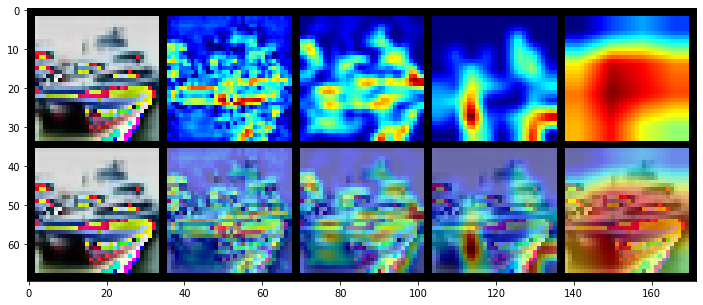

In [13]:
import PIL
import matplotlib.pyplot as plt
import numpy as np
from Utils import change, visualize_cam, imshow, plot_images

trans = transforms.ToPILImage()
pil_img=trans(torchvision.utils.make_grid(images[1]))
torch_img,normed_torch_img=change(pil_img,device)
plot_images(torch_img,normed_torch_img, model)
print ("SHIP")


CAR


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:2416: UserWarning: nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.
  warnings.warn("nn.functional.upsample is deprecated. Use nn.functional.interpolate instead.")


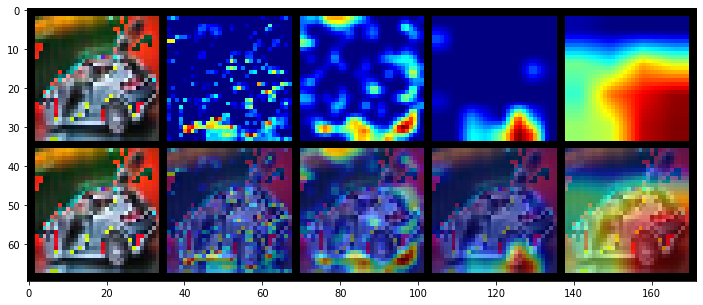

In [14]:
trans2 = transforms.ToPILImage()
pil_img2=trans2(torchvision.utils.make_grid(images[6]))
torch_img2,normed_torch_img2=change(pil_img2,device)
plot_images(torch_img2,normed_torch_img2, model)
print ("CAR")

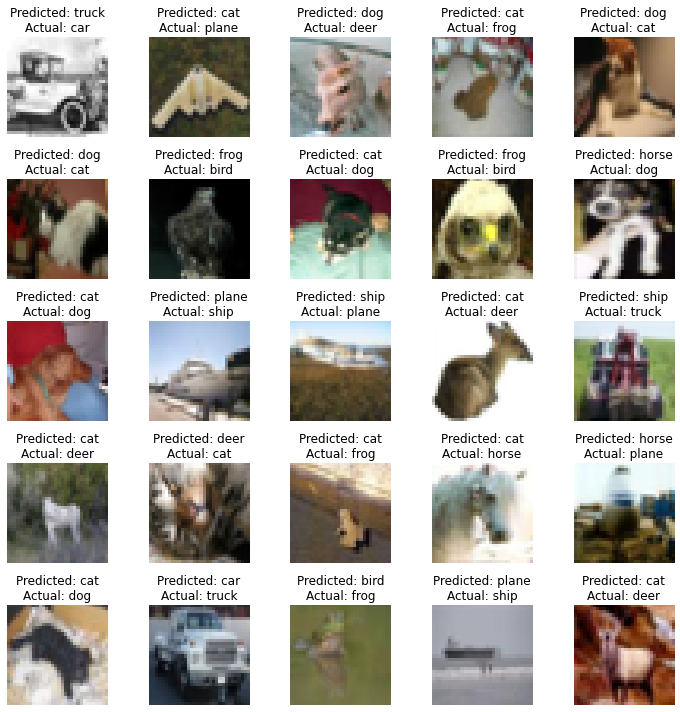

In [15]:
new_model.plot_misclassified('mis.jpg')

In [16]:
new_model.total_accuracy()

Accuracy of the network on the 10000 test images: 92 %


In [17]:
new_model.classwise_acc()


Accuracy of plane : 89 %
Accuracy of   car : 100 %
Accuracy of  bird : 87 %
Accuracy of   cat : 79 %
Accuracy of  deer : 96 %
Accuracy of   dog : 81 %
Accuracy of  frog : 88 %
Accuracy of horse : 84 %
Accuracy of  ship : 93 %
Accuracy of truck : 92 %



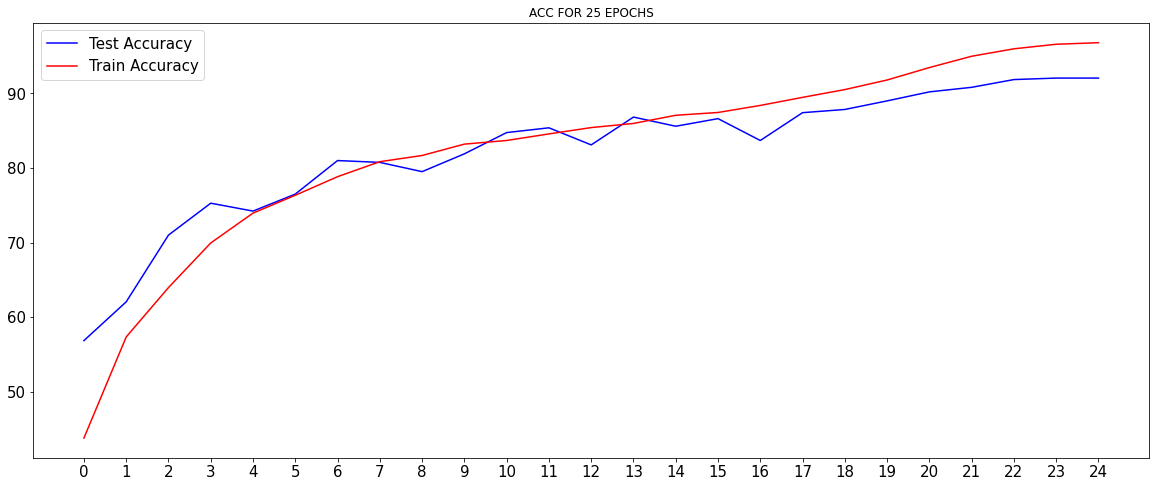

In [18]:
new_model.plot_train_test_acc()